<a href="https://colab.research.google.com/github/munishka-vijay/github-pages-with-jekyll/blob/main/LDA_to_analyze_User_Opinion_on_Social_Media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk import FreqDist
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\itsme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora


import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\itsme\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
C:\Users\itsme\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [ ]:
import gensim
gensim.__version__

C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'4.0.1'

In [ ]:
from pandas.compat._optional import import_optional_dependency

C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv('Vaccines_new.csv')
df.head()

C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Name,reviewText
0,a,"Private hospitals run out of vaccines. Huge crowds, no social distancing at government vaccination centres"
1,Dipesh Barot,You need to do alot of homework before you blindly oppose pfizer vaccine. There are people suffering from autoimmune disorders and they cannot take covishield or covaxin. Pfizer works best for suc...
2,b,Civic vaccination centres to be shut in Mumbai tomorrow July 21
3,Luv,"- No precautions at all, whatsoever. No one wears masks(Even the people who are vaccinating)\n- The lady who vaccinated me asked me wether it was my 1st shot or 2nd shot and wether my 1st was covi..."
4,c,Results indicate that the pandemic is not over yet and we need to ramp up vaccination


In [ ]:
#define a funcion here and call on next line
def freq_words(x, terms = 30):
  all_words = ' '.join([str(text) for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  pd.DataFrame(words_df).to_csv('word_count3.csv', index=False)


  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(30,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


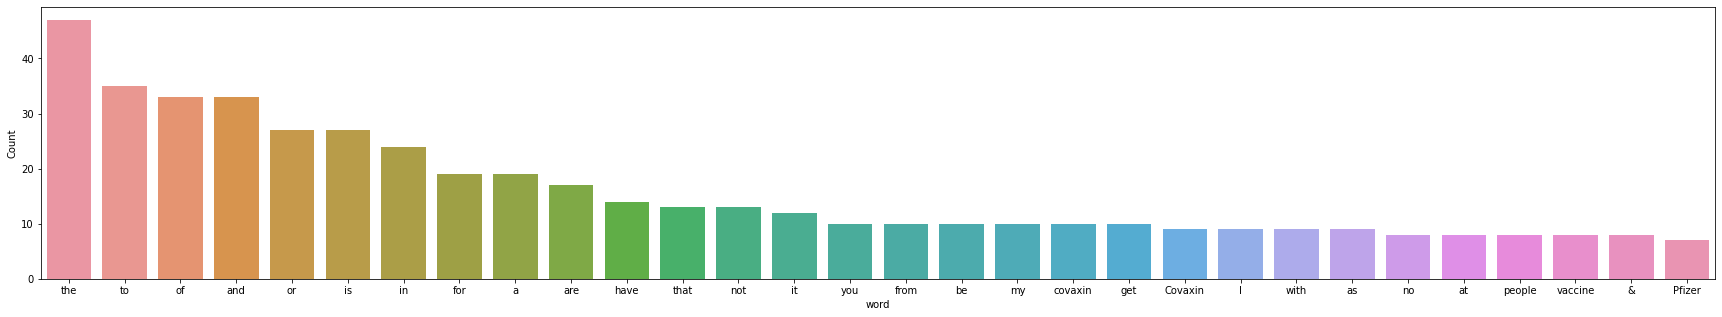

In [ ]:
#function call to display freq words
freq_words(df['reviewText'])

In [ ]:
df['reviewText'] = df['reviewText'].str.replace("[^a-zA-Z#]", " ")

C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-8-d68a350bdfec>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviewText'] = df['reviewText'].str.replace("[^a-zA-Z#]", " ")


In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# remove short words
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([w for w in str(x).split() if len(w)>2]))

def remove_stopwords(rev):
    rev_new = " ".join([str(i) for i in rev if i not in stop_words])
    return rev_new

# remove stopwords
reviews = [remove_stopwords(r.split()) for r in df['reviewText']]

# make words to lowercase
reviews = [r.lower() for r in reviews]

C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


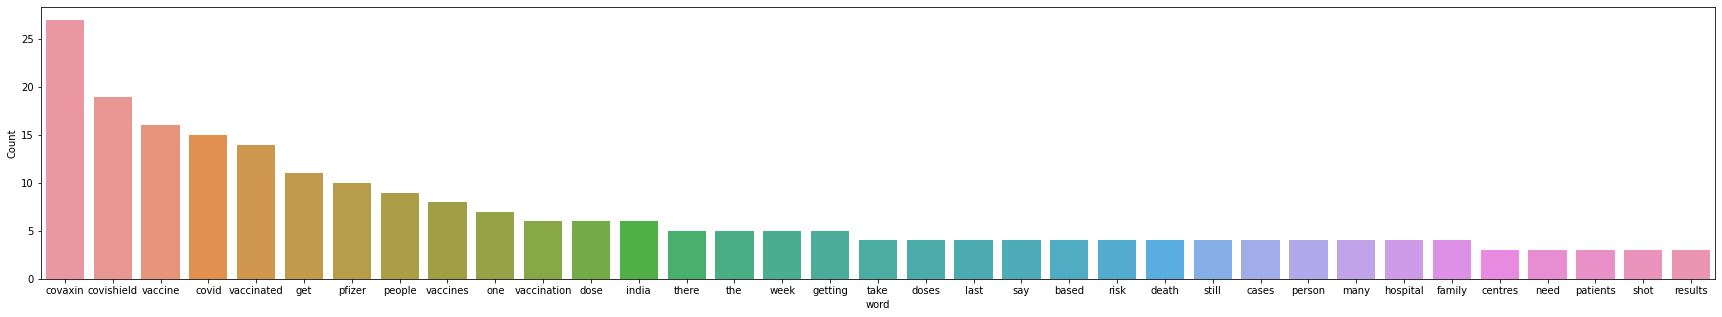

In [ ]:
freq_words(reviews, 35)

In [ ]:
!python -m spacy download en

C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'C:\Users\itsme\anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['you', 'need', 'alot', 'homework', 'blindly', 'oppose', 'pfizer', 'vaccine', 'there', 'people', 'suffering', 'autoimmune', 'disorders', 'cannot', 'take', 'covishield', 'covaxin', 'pfizer', 'works', 'best', 'patients', 'hence', 'advised', 'doctors']


C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['alot', 'homework', 'pfizer', 'vaccine', 'people', 'autoimmune', 'disorder', 'covishield', 'covaxin', 'pfizer', 'good', 'patient', 'doctor']


C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


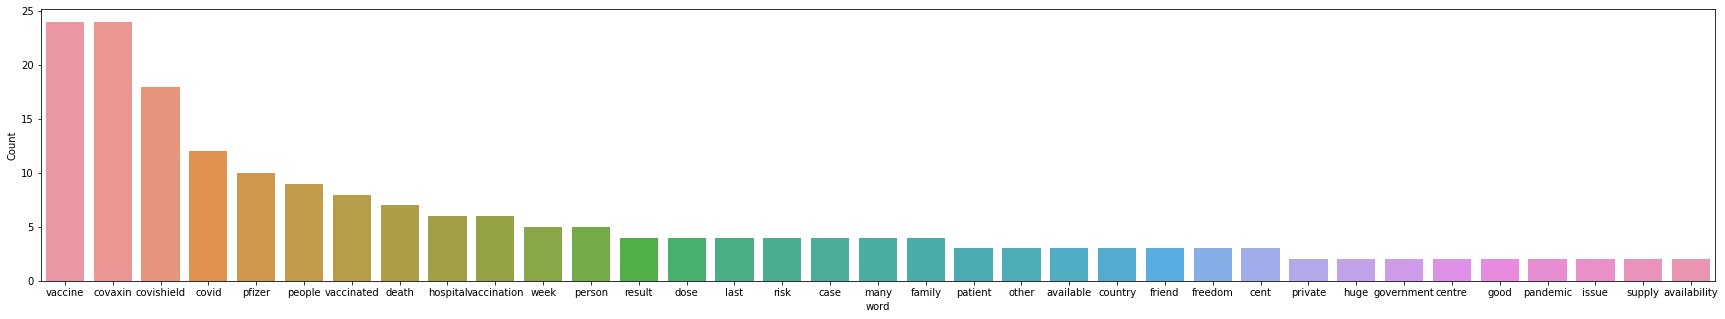

In [ ]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df['reviews'] = reviews_3

freq_words(df['reviews'], 35)

In [ ]:
dictionary = corpora.Dictionary(reviews_2)

C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=8, random_state=100,
                chunksize=10, passes=50)

C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=reviews_2, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.4240211057407409


In [ ]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=reviews_2, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 10
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(doc_term_matrix)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(doc_term_matrix, num_of_docs*0.75), 
               doc_term_matrix]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=doc_term_matrix, dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
 89%|███████████████████████████████████████████████████████████████████████         | 480/540 [30:56<03:52,  3.87s/it]


In [ ]:
re = pd.read_csv('lda_tuning_results.csv')
re.sort_values(by=['Coherence'],ascending=[False]).head(20)


C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Validation_Set,Topics,Alpha,Beta,Coherence
207,75% Corpus,8,asymmetric,0.61,0.520259
447,100% Corpus,8,asymmetric,0.61,0.520259
58,75% Corpus,3,asymmetric,0.9099999999999999,0.517997
298,100% Corpus,3,asymmetric,0.9099999999999999,0.517997
60,75% Corpus,4,0.01,0.01,0.501109
330,100% Corpus,5,0.01,0.01,0.500610
300,100% Corpus,4,0.01,0.01,0.500202
448,100% Corpus,8,asymmetric,0.9099999999999999,0.499563
208,75% Corpus,8,asymmetric,0.9099999999999999,0.499563
301,100% Corpus,4,0.01,0.31,0.498874


In [ ]:
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=8, random_state=100,
                chunksize=10, passes=50,alpha='asymmetric',eta=0.61)

C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model.print_topics()

C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.036*"vaccine" + 0.020*"covaxin" + 0.017*"family" + 0.015*"covid" + 0.014*"cent" + 0.014*"person" + 0.014*"freedom" + 0.012*"available" + 0.012*"other" + 0.012*"risk"'),
 (1,
  '0.009*"vaccination" + 0.009*"official" + 0.009*"chimp" + 0.009*"aware" + 0.009*"nationalistic" + 0.009*"vacci" + 0.009*"fact" + 0.009*"record" + 0.009*"wrong" + 0.009*"mom"'),
 (2,
  '0.028*"vaccine" + 0.017*"covishield" + 0.017*"covaxin" + 0.011*"severity" + 0.010*"variant" + 0.010*"delta" + 0.010*"efficacy" + 0.007*"reduction" + 0.007*"patient" + 0.007*"protection"'),
 (3,
  '0.023*"vaccinated" + 0.022*"covid" + 0.020*"death" + 0.019*"week" + 0.018*"hospital" + 0.017*"last" + 0.015*"people" + 0.014*"covaxin" + 0.013*"case" + 0.011*"chain"'),
 (4,
  '0.018*"person" + 0.017*"story" + 0.013*"vaccine" + 0.011*"number" + 0.010*"mainstream" + 0.010*"share" + 0.010*"thousand" + 0.010*"medium" + 0.010*"horrendous" + 0.010*"experience"'),
 (5,
  '0.015*"marketing" + 0.015*"dance" + 0.015*"cat" + 0.009*"integr

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\itsme\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.017177  0.020407       1        1  20.274588
7     -0.022136  0.029151       2        1  19.708994
3     -0.034940 -0.050236       3        1  18.099588
2     -0.004017  0.018464       4        1  13.582833
5      0.056496 -0.011421       5        1  10.498434
4      0.007018  0.002195       6        1   7.734939
1      0.009258 -0.002210       7        1   6.551903
6      0.005498 -0.006349       8        1   3.548722, topic_info=           Term      Freq     Total Category  logprob  loglift
12   covishield  6.000000  6.000000  Default  30.0000  30.0000
8       vaccine  8.000000  8.000000  Default  29.0000  29.0000
55        covid  4.000000  4.000000  Default  28.0000  28.0000
77       person  2.000000  2.000000  Default  27.0000  27.0000
19       pfizer  3.000000  3.000000  Default  26.0000  26.0000
..          ...       ...       ...      ...      ...      ...
119       world  0.053903  1.815227   Topic8  -5.7641  -0.1782
122      friend  0.053903  2.194257   Topic8  -5.7641  -0.3678
149        many  0.053903  2.587812   Topic8  -5.7641  -0.5328
191    official  0.053903  1.747523   Topic8  -5.7641  -0.1402
0        centre  0.053903  1.533836   Topic8  -5.7641  -0.0098

[324 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
120       2  0.662402         able
185       3  0.638946  application
206       3  0.639364  appointment
186       3  0.638946     approval
145       1  0.661426        astra
...     ...       ...          ...
204       3  0.639366         wait
59        3  0.752457         week
205       3  0.639366      willing
155       1  0.516373       worker
119       3  0.550895        world

[118 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 8, 4, 3, 6, 5, 2, 7])